<a href="https://colab.research.google.com/github/CallmeAk/Digantra-Assignment/blob/main/Digantara_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DIGANTARA - Data Analyst Assignment (EDA)

**Objective**

The objectives of this Exploratory Data Analysis (EDA) on the predicted satellite conjunction dataset are to understand the dataset, identify potential risks and trends in conjunction scenarios, explore relationships between variables, investigate time-based patterns, pinpoint influential features for collision predictions, ensure data quality, and leverage visualizations for effective communication of insights.

In [2]:
!pip install dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 74.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

<ipython-input-3-4b121f31a624>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [9]:
data=pd.read_csv('sort-minRange.csv')


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67438 entries, 0 to 67437
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NORAD_CAT_ID_1      67438 non-null  int64  
 1   OBJECT_NAME_1       67438 non-null  object 
 2   DSE_1               67438 non-null  float64
 3   NORAD_CAT_ID_2      67438 non-null  int64  
 4   OBJECT_NAME_2       67438 non-null  object 
 5   DSE_2               67438 non-null  float64
 6   TCA                 67438 non-null  object 
 7   TCA_RANGE           67438 non-null  float64
 8   TCA_RELATIVE_SPEED  67438 non-null  float64
 9   MAX_PROB            67438 non-null  float64
 10  DILUTION            67438 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 5.7+ MB


In [6]:
df.shape

(67438, 11)

In [7]:
df.describe()

,NORAD_CAT_ID_1,DSE_1,NORAD_CAT_ID_2,DSE_2,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
count,67438.000000,67438.000000,67438.000000,67438.00000,67438.000000,67438.000000,6.743800e+04,67438.000000
mean,48490.676755,3.919063,43499.045998,4.34854,3.327071,11.357984,8.458844e-06,1.396955
std,7068.787028,2.069418,22860.191908,2.72684,1.183404,3.786706,2.184846e-04,0.710516
min,900.000000,0.086000,11.000000,0.10000,0.020000,0.000000,1.792000e-08,0.008000
25%,43885.000000,2.160000,32080.750000,2.35700,2.494000,8.909000,2.438000e-07,0.885000
50%,48916.000000,3.924000,46396.000000,4.20500,3.526000,12.872000,1.057000e-06,1.267000
75%,53890.000000,5.657000,56192.000000,5.98800,4.330000,14.409000,2.458000e-06,1.854000
max,58255.000000,35.654000,270286.000000,35.12400,5.000000,16.786000,4.609000e-02,3.534000


In [11]:
data.isnull().sum()


NORAD_CAT_ID_1        0
OBJECT_NAME_1         0
DSE_1                 0
NORAD_CAT_ID_2        0
OBJECT_NAME_2         0
DSE_2                 0
TCA                   0
TCA_RANGE             0
TCA_RELATIVE_SPEED    0
MAX_PROB              0
DILUTION              0
dtype: int64

In [12]:
data.isna().sum()


NORAD_CAT_ID_1        0
OBJECT_NAME_1         0
DSE_1                 0
NORAD_CAT_ID_2        0
OBJECT_NAME_2         0
DSE_2                 0
TCA                   0
TCA_RANGE             0
TCA_RELATIVE_SPEED    0
MAX_PROB              0
DILUTION              0
dtype: int64

In [13]:
data.nunique()


NORAD_CAT_ID_1         7852
OBJECT_NAME_1          7718
DSE_1                  7613
NORAD_CAT_ID_2        12921
OBJECT_NAME_2          6681
DSE_2                  9982
TCA                   67383
TCA_RANGE              4812
TCA_RELATIVE_SPEED    12997
MAX_PROB              19896
DILUTION               3446
dtype: int64

In [15]:
data.duplicated().sum()


0

**Lets look for Outliers**


<Axes: >

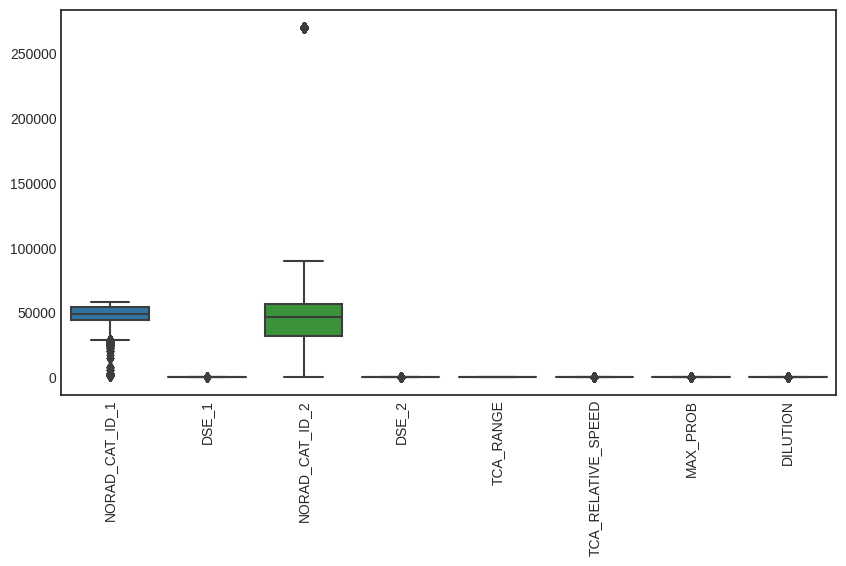

In [16]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(data)

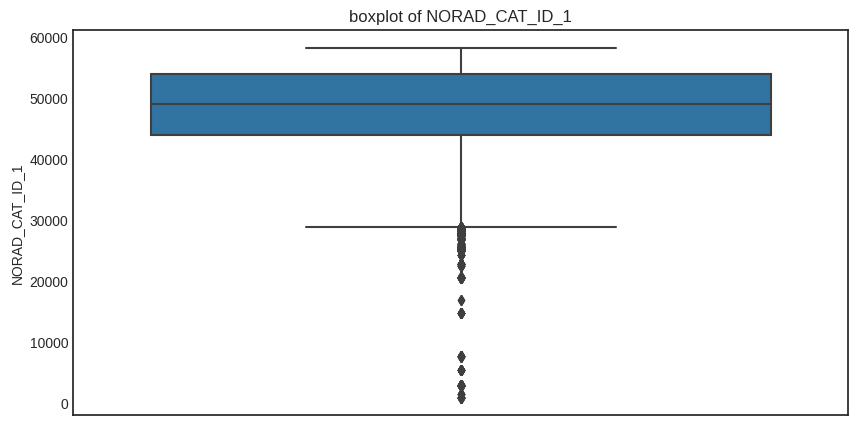

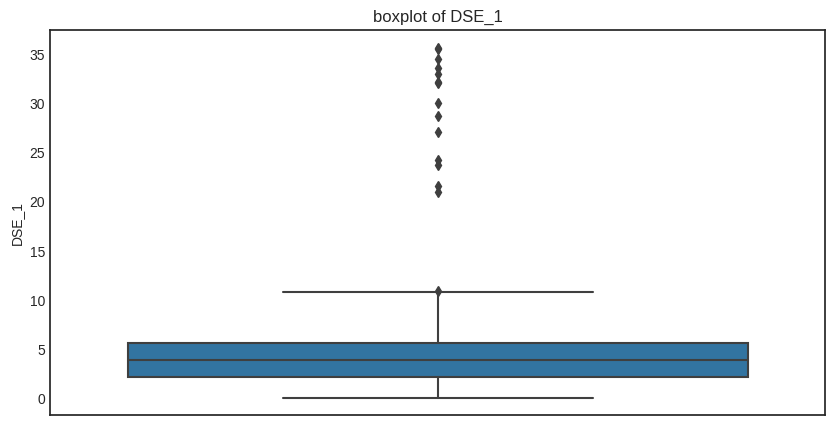

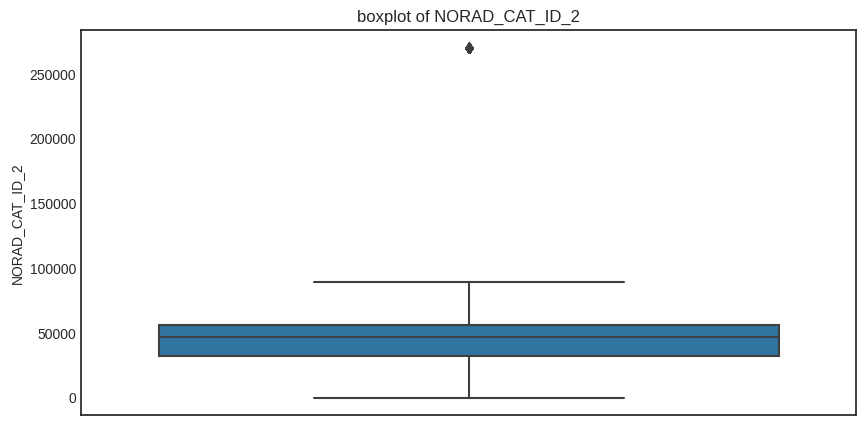

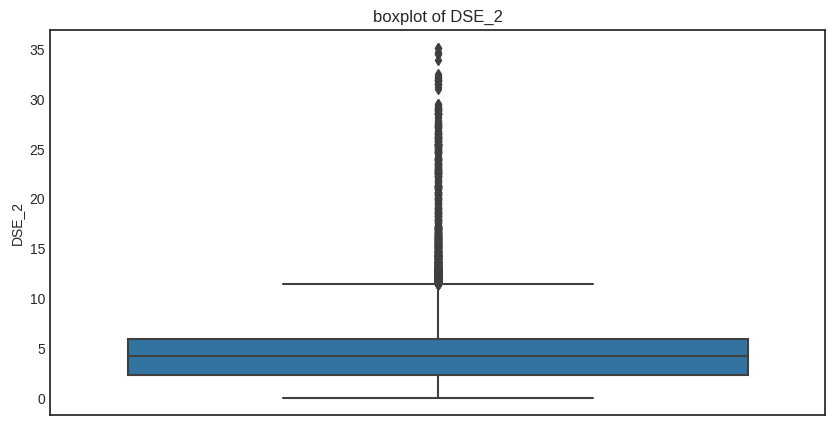

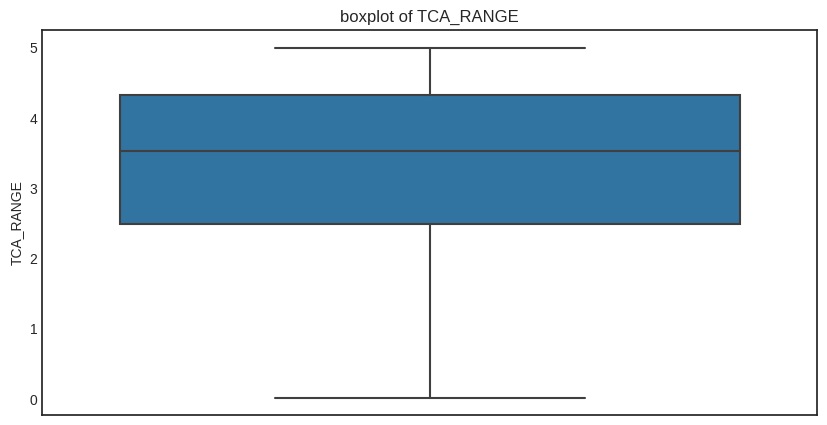

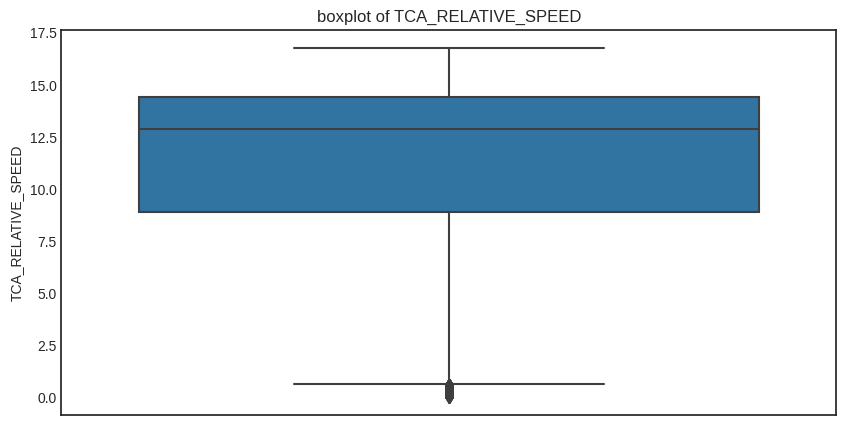

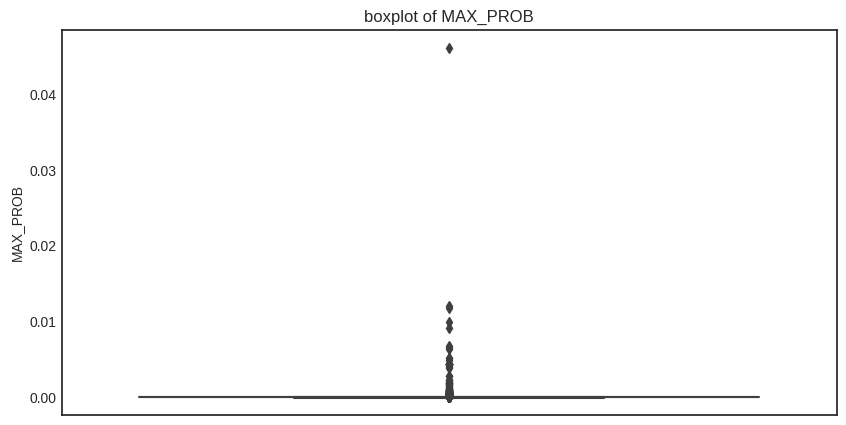

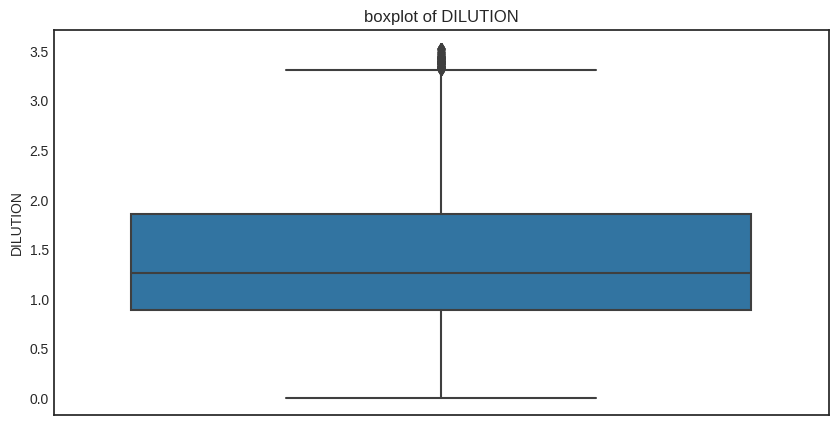

In [17]:
for column in data.columns:
    if data[column].dtype!='object':
        plt.figure(figsize=(10,5))
        sns.boxplot(y=column,data=data)
        plt.ylabel(column)
        plt.title(f'boxplot of {column}')
        plt.show()

**Now Lets Handle Outliers**

In [18]:
for column in ['NORAD_CAT_ID_1','DSE_1','NORAD_CAT_ID_2','DSE_2','TCA_RANGE','TCA_RELATIVE_SPEED','MAX_PROB','DILUTION']:
    if data[column].dtype!='object':
        q1=data[column].quantile(0.25)
        q3=data[column].quantile(0.75)
        IQR=q3-q1
        lower_range=q1-(IQR*1.5)
        upper_range=q3+(IQR*1.5)
        data[column]=np.where(data[column]<lower_range,lower_range,
                     np.where(data[column]>upper_range,upper_range,
                     data[column]))

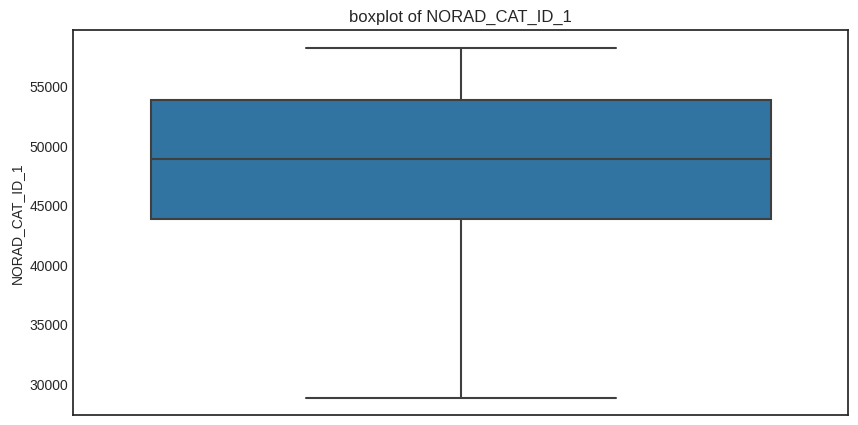

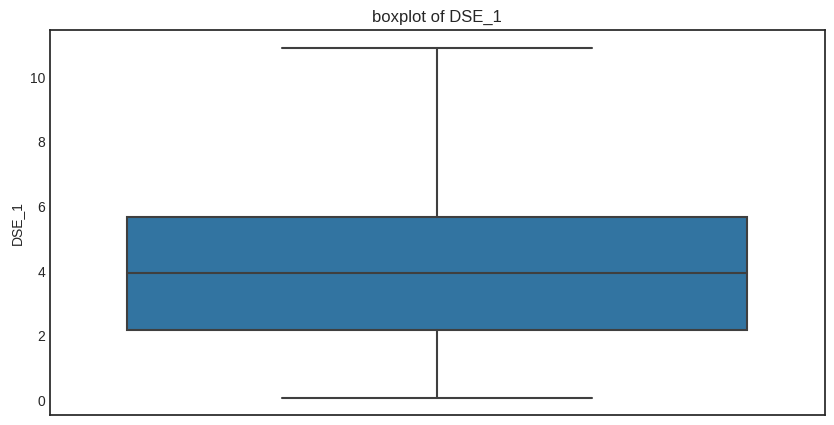

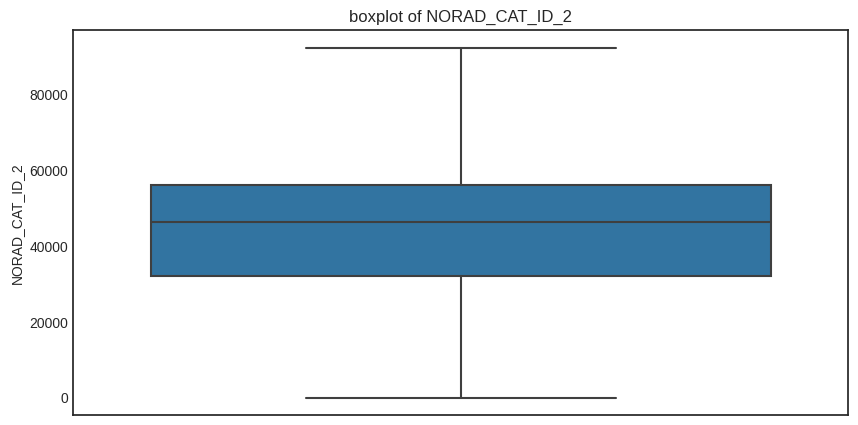

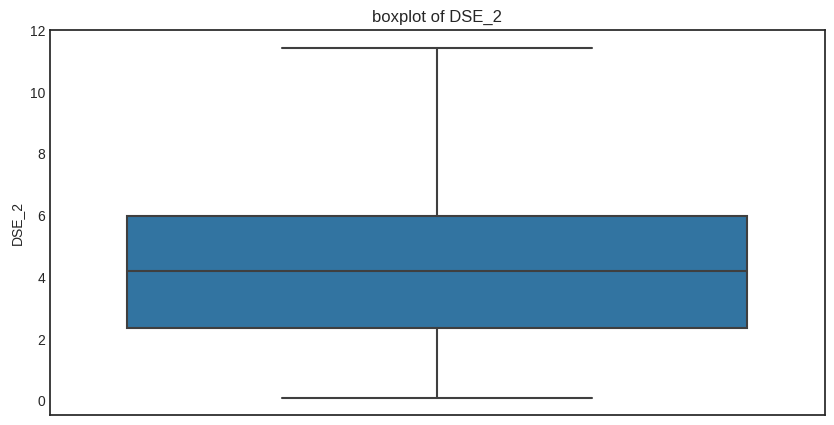

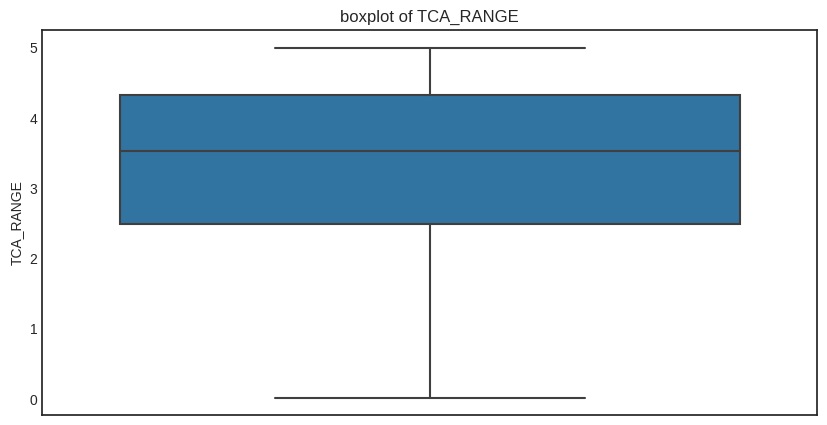

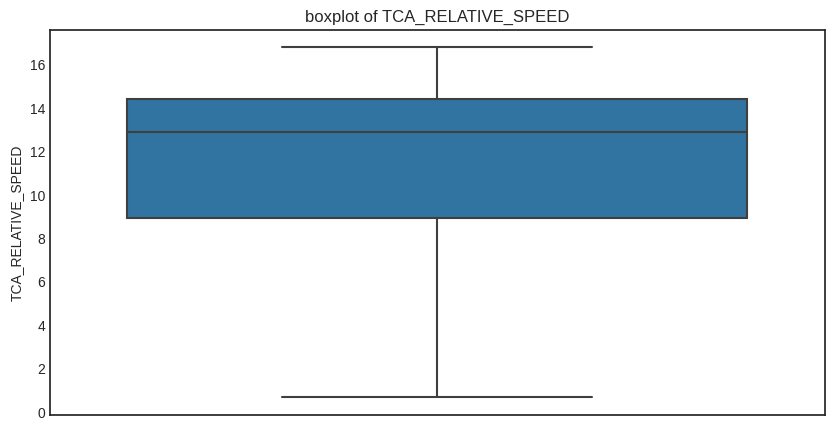

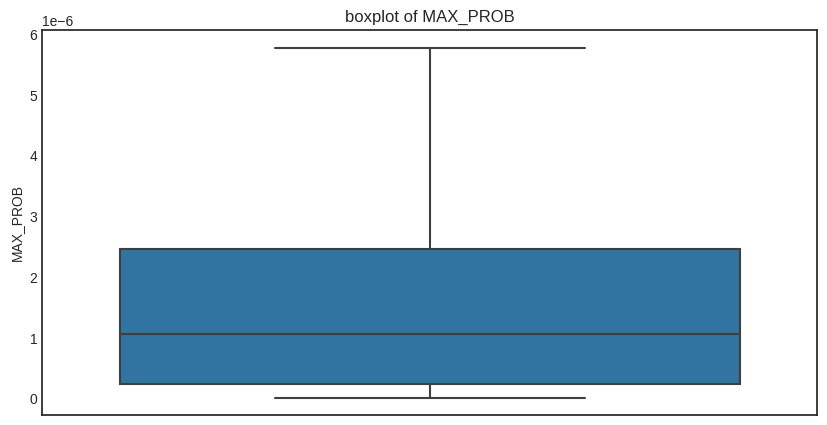

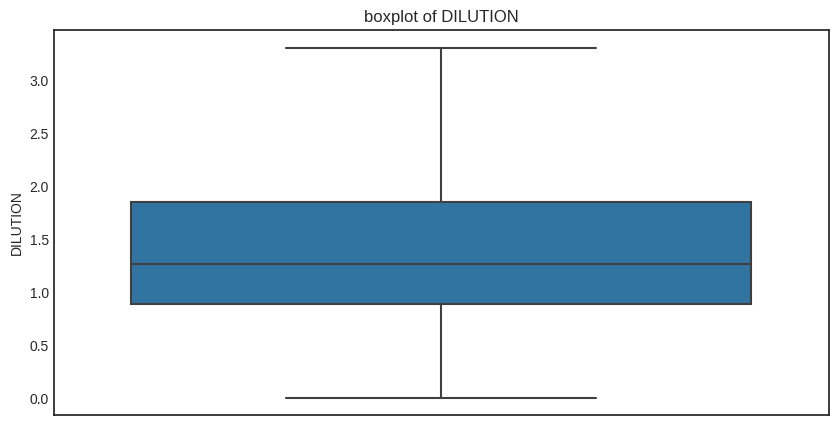

In [19]:
for column in ['NORAD_CAT_ID_1','DSE_1','NORAD_CAT_ID_2','DSE_2','TCA_RANGE','TCA_RELATIVE_SPEED','MAX_PROB','DILUTION']:
    if data[column].dtype!='object':
        plt.figure(figsize=(10,5))
        sns.boxplot(y=column,data=data)
        plt.ylabel(column)
        plt.title(f'boxplot of {column}')
        plt.show()

**Question 1**

A) Derive high level analytics from the whole data set for a single day. In other words, derive general analytics of the whole set of conjunction scenarios (for e.g. number of conjunctions among active satellites). The analytics should be intuitive and represented in an easily understandable format.

In [20]:
data.duplicated().value_counts()


False    67438
dtype: int64

In [21]:
total_conjunctions = len(data)
active_satellites_conjunctions = len(data)

In [22]:
average_range = data['TCA_RANGE'].mean()
max_probability = data['MAX_PROB'].max()

In [23]:
print(f"Total Conjunctions: {total_conjunctions}")
print(f"active satellites conjunctions: {active_satellites_conjunctions}")
print(f"Average TCA Range: {average_range}")
print(f"Maximum Probability of Collision: {max_probability}")

Total Conjunctions: 67438
active satellites conjunctions: 67438
Average TCA Range: 3.3270707019781134
Maximum Probability of Collision: 5.7793e-06


**Lets create some visulization for this question**


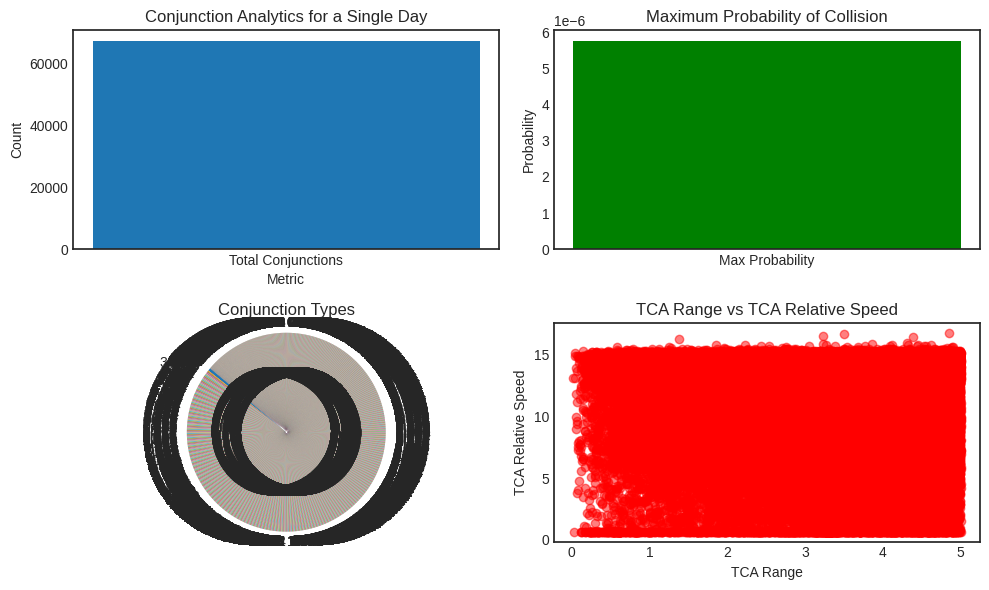

In [24]:
plt.figure(figsize=(10, 6))

# Create a bar chart of Total Conjunctions
plt.subplot(2, 2, 1)
plt.bar(['Total Conjunctions'], [total_conjunctions])
plt.xlabel('Metric')
plt.ylabel('Count')
plt.title('Conjunction Analytics for a Single Day')

# Create a bar chart of Maximum Probability
plt.subplot(2, 2, 2)
plt.bar(['Max Probability'], [max_probability], color='green')
plt.ylabel('Probability')
plt.title('Maximum Probability of Collision')

# Create a pie chart of Conjunction Types
conjunction_types = data['DILUTION'].value_counts()
plt.subplot(2, 2, 3)
plt.pie(conjunction_types, labels=conjunction_types.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Conjunction Types')

# Create a scatter plot of TCA Range vs Relative Speed
plt.subplot(2, 2, 4)
plt.scatter(data['TCA_RANGE'], data['TCA_RELATIVE_SPEED'], color='red', alpha=0.5)
plt.xlabel('TCA Range')
plt.ylabel('TCA Relative Speed')
plt.title('TCA Range vs TCA Relative Speed')

plt.tight_layout()

**Histogram of TCA Range**

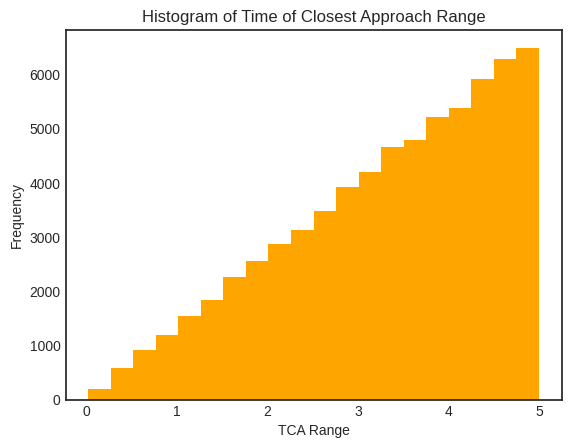

In [27]:
plt.hist(data['TCA_RANGE'],bins=20,color='orange')
plt.title('Histogram of Time of Closest Approach Range')
plt.xlabel('TCA Range')
plt.ylabel('Frequency')
plt.show()

This code creates a histogram that showcases the distribution of 'TCA_RANGE' values in our dataset.

It's useful for understanding the distribution and frequency of the time of closest approach range values among the satellite conjunction scenarios in our data.

**Histogram of TCA relative speed**


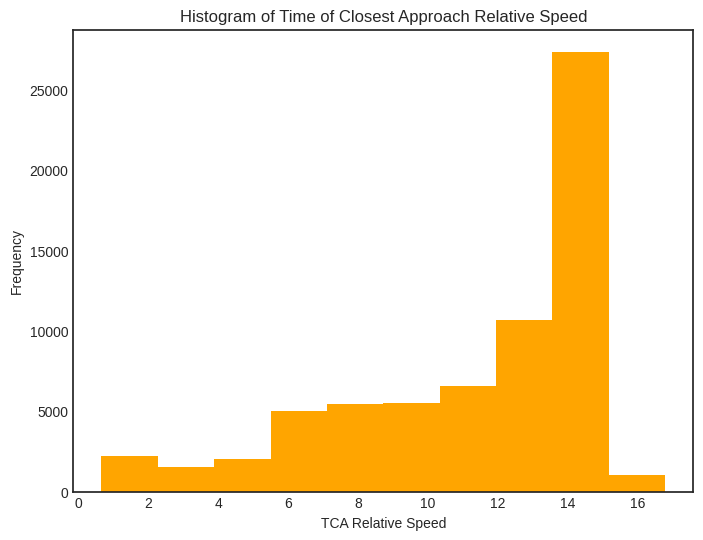

In [28]:
plt.figure(figsize=(8, 6))
plt.hist(data['TCA_RELATIVE_SPEED'],bins=10,color='orange')
plt.title('Histogram of Time of Closest Approach Relative Speed')
plt.xlabel('TCA Relative Speed')
plt.ylabel('Frequency')
plt.show()

This code creates a histogram to visualize the distribution of 'TCA_RELATIVE_SPEED' values in our dataset.

**Histogram of maximum probability collision**

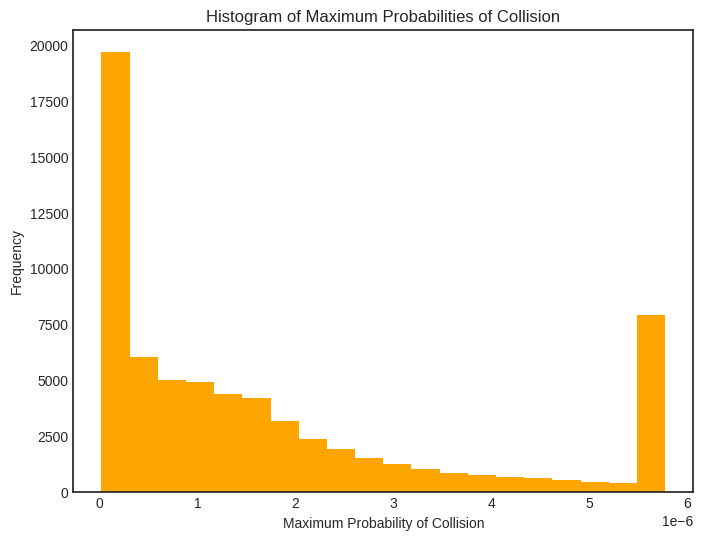

In [29]:
plt.figure(figsize=(8, 6))
plt.hist(data['MAX_PROB'],bins=20,color='orange')
plt.title('Histogram of Maximum Probabilities of Collision')
plt.xlabel('Maximum Probability of Collision')
plt.ylabel('Frequency')
plt.show()

This code creates a histogram to represent the distribution of 'MAX_PROB' values in our dataset, allowing us to visually understand the frequency and range of maximum collision probabilities present in the data.

**Relationship between pair plots**


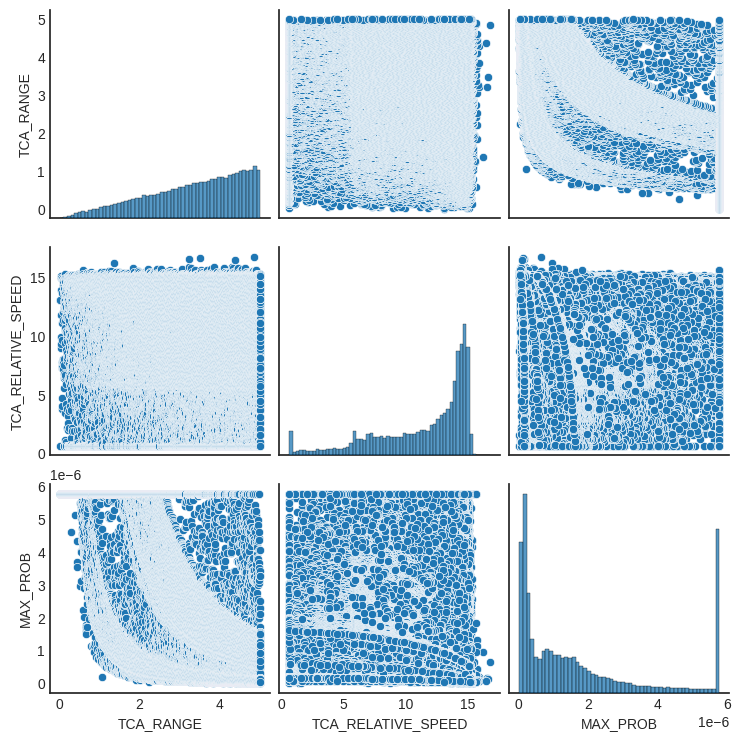

In [30]:
numerical_columns = ['TCA_RANGE','TCA_RELATIVE_SPEED','MAX_PROB']

sns.pairplot(data[numerical_columns])
plt.show()

* The pairplot is a powerful visualization tool to identify patterns, correlations, and distributions between multiple numerical variables in your dataset.


* It helps in understanding how different variables relate to each other, potentially revealing trends, associations, or dependencies between the selected columns.

**Correlations between numerical columns**


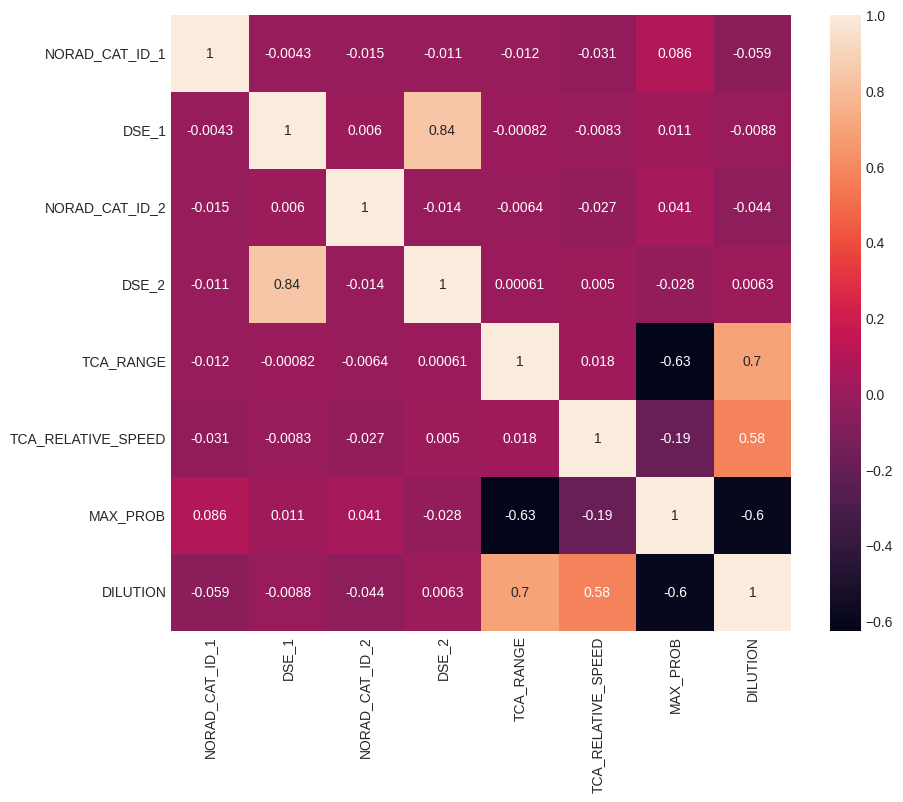

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(),annot=True)
plt.show()

The heatmap visualization of the correlation matrix provides a visual representation of how strongly different numerical columns in the dataset are related. Positive values close to 1 indicate a strong positive correlation, negative values close to -1 indicate a strong negative correlation, and values close to 0 suggest weak or no correlation between columns.

**Q- 1 B)** Represent the conjunctions data of a single satellite or a satellite constellation. The analytics should be intuitive, represented in an easily understandable format and should enable decision making from a satellite operator’s point of view.

**Timeline of conjunction of single satellite**

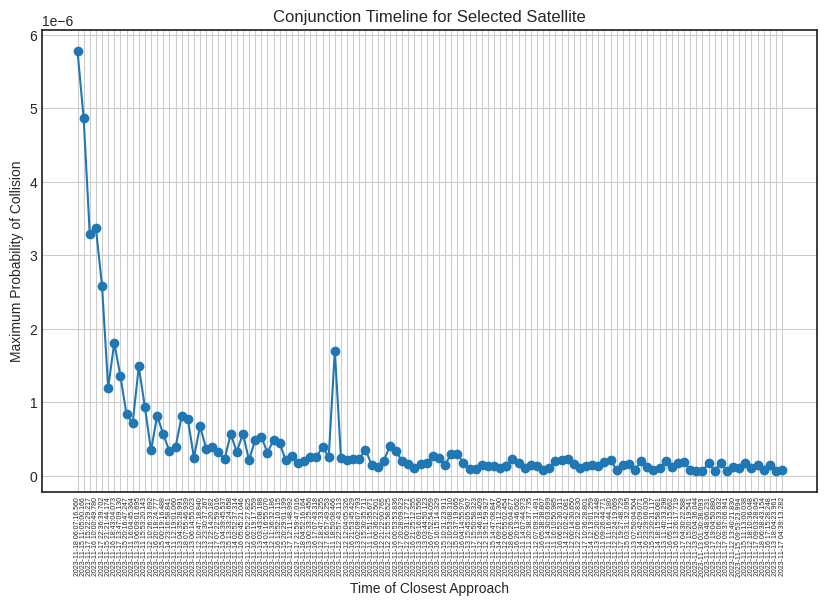

In [33]:
selected_satellite_data=data[data['OBJECT_NAME_1']=='OBJECT E [+]']

# Plotting timeline of conjunctions
plt.figure(figsize=(10,6))
plt.plot(selected_satellite_data['TCA'],selected_satellite_data['MAX_PROB'],marker='o')
plt.xlabel('Time of Closest Approach')
plt.ylabel('Maximum Probability of Collision')
plt.title('Conjunction Timeline for Selected Satellite')
plt.xticks(rotation=90)
plt.xticks(fontsize=5)
plt.grid(True)
plt.show()

This code visualizes the conjunction timeline for the specific satellite 'OBJECT E [+]', illustrating how the 'Maximum Probability of Collision' varies concerning the 'Time of Closest Approach' for its respective conjunction events.


In [34]:
# Displaying all the unique 'OBJECT_NAME_1' to select the appropriate one
data["OBJECT_NAME_1"].value_counts()

OBJECT A [+]                333
OBJECT B [+]                145
OBJECT C [+]                138
LEMUR-2-REMY-COLTON [+]     135
AAUSAT-II [P]               132
                           ... 
ULTP [+]                      1
STARLINK-5096 [+]             1
FOSSASAT-2E13 [+]             1
STARLINK-30284 [+]            1
LEMUR-2-JOHN-TREIRES [+]      1
Name: OBJECT_NAME_1, Length: 7718, dtype: int64

In [35]:
chosen_satellite = 'STARLINK-2466 [+]'  # Selecting single object in 'OBJECT_NAME_1'
chosen_data = data[data['OBJECT_NAME_1'] == chosen_satellite]
chosen_data

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
7867,48125.0,STARLINK-2466 [+],5.761,56748.0,OBJECT F [+],5.145,2023-11-16 06:07:55.835,1.698,13.970,0.000006,0.809
9197,48125.0,STARLINK-2466 [+],3.533,34424.0,COSMOS 2251 DEB [-],3.190,2023-11-14 00:40:10.644,1.832,8.253,0.000006,0.503
9674,48125.0,STARLINK-2466 [+],6.946,43068.0,H-2A DEB [-],6.529,2023-11-17 10:33:56.448,1.879,9.480,0.000006,0.548
40658,48125.0,STARLINK-2466 [+],1.893,81696.0,UNKNOWN [-],1.727,2023-11-12 09:18:33.278,3.875,14.656,0.000001,2.208
42722,48125.0,STARLINK-2466 [+],3.745,41337.0,ASTRO-H (HITOMI) [-],3.550,2023-11-14 05:45:03.113,3.976,3.161,0.000002,0.956
49671,48125.0,STARLINK-2466 [+],3.993,22.0,EXPLORER 7 [?],3.604,2023-11-14 11:42:13.632,4.292,1.081,0.000002,1.014
65393,48125.0,STARLINK-2466 [+],7.335,57322.0,OBJECT AW [-],6.678,2023-11-17 19:54:16.331,4.919,6.041,0.000002,1.250


In [36]:
conjunctions_count = len(chosen_data)
conjunctions_count

7

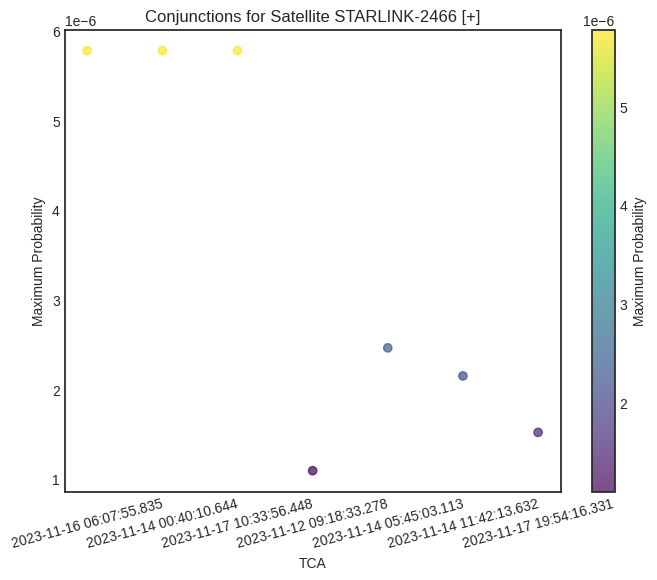

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(chosen_data['TCA'], chosen_data['MAX_PROB'], c=chosen_data['MAX_PROB'], cmap='viridis', alpha=0.7)
plt.xlabel('TCA')
plt.ylabel('Maximum Probability')
plt.colorbar(label='Maximum Probability')
plt.xticks(rotation=15)
plt.title(f'Conjunctions for Satellite {chosen_satellite}')
plt.show()


**Question 2**

Use the whole dataset that spans about five days. Derive analytics and visualise the data/analytics accounting for the evolution from the first day (for e.g. the number of conjunctions of the RSO having NORAD ID 12345 over 7 days of analysis)



**Total number of conjunctions occuring per day**

In [38]:
data['TCA']=pd.to_datetime(data['TCA'])

daily_conjunction_counts=data.resample('D', on='TCA').size()

print(daily_conjunction_counts)

TCA
2023-11-11    6613
2023-11-12    9486
2023-11-13    9578
2023-11-14    9634
2023-11-15    9772
2023-11-16    9573
2023-11-17    9539
2023-11-18    3243
Freq: D, dtype: int64


**Visualization of total number of conjunctions occuring per day**


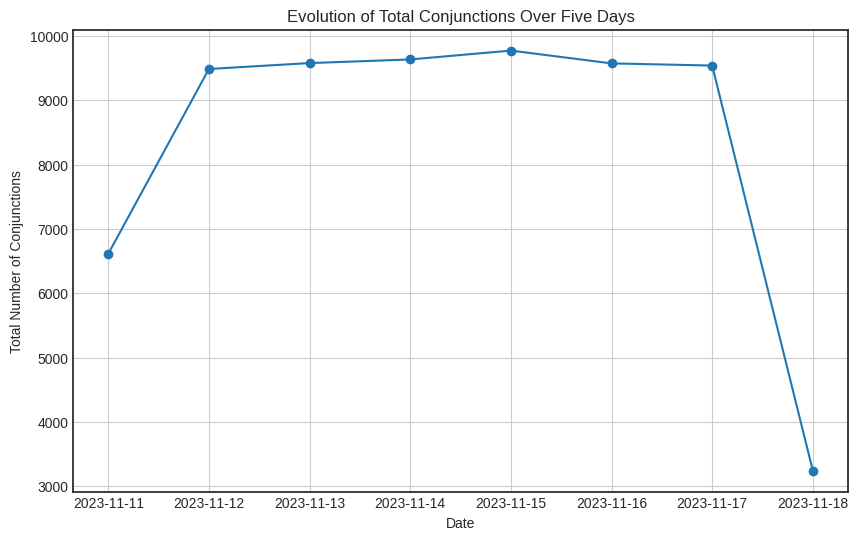

In [39]:
data['TCA']=pd.to_datetime(data['TCA'])

#copy the orginal data
data_copy=data.copy()

# Set 'TCA' as the index
data_copy=data_copy.set_index('TCA')

total_conjunctions_per_day=data_copy.resample('D').size()

plt.figure(figsize=(10, 6))
plt.plot(total_conjunctions_per_day.index, total_conjunctions_per_day.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Total Number of Conjunctions')
plt.title('Evolution of Total Conjunctions Over Five Days')
plt.grid(True)
plt.show()

This code produces a visualization illustrating the trend in total conjunctions occurring each day over the five-day period, providing insights into the fluctuations and patterns in the frequency of conjunction events within this timeframe.

**The number of conjunctions of the RSO having NORAD ID 51950 over 7 days of analysis**

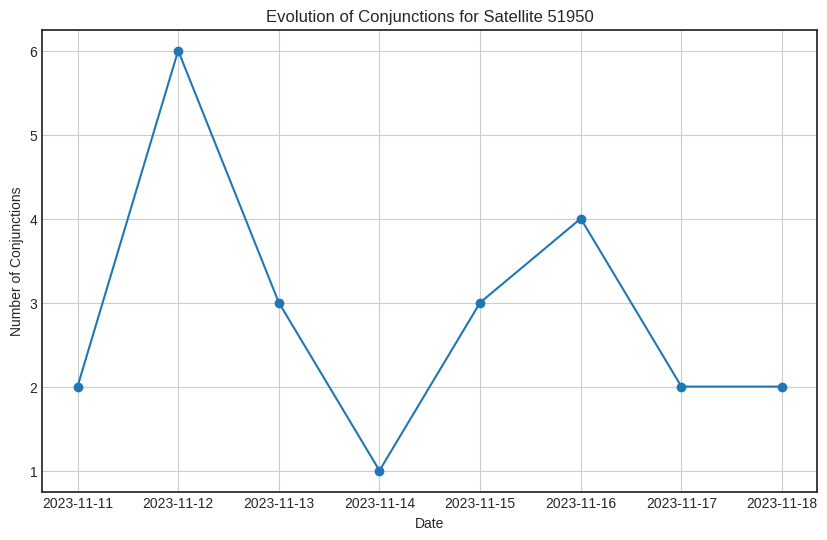

In [40]:
data_copy=data.copy()

selected_satellite_data=data_copy[data_copy['NORAD_CAT_ID_1']==51950]

data_copy['TCA']=pd.to_datetime(data_copy['TCA'])

selected_satellite_data=selected_satellite_data.set_index('TCA')


conjunctions_per_day=selected_satellite_data.resample('D').size()

plt.figure(figsize=(10, 6))
plt.plot(conjunctions_per_day.index, conjunctions_per_day.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Conjunctions')
plt.title('Evolution of Conjunctions for Satellite 51950')
plt.grid(True)
plt.show()

This code is visualizing the trend of conjunctions for a specific satellite(ie,NORAD_CAT_ID_1'=51950) over time, demonstrating the fluctuation in the number of conjunctions across different days.

# Data Retrieval and Aggregation

In [41]:
dfs = []
for day in range(1, 6):
    df = pd.read_csv('sort-minRange.csv')
    dfs.append(df)

In [42]:
merged_data = pd.concat(dfs, ignore_index=True)
merged_data.head()

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
0,48478,STARLINK-2728 [+],0.412,40035,FLOCK 1C-9 [-],0.489,2023-11-11 09:08:06.335,0.020,13.097,0.046090,0.008
1,58199,TIANHUI 5A [+],5.762,58201,TIANHUI 5B [+],5.762,2023-11-16 22:05:09.268,0.031,0.000,0.004432,0.008
2,28470,JB-3 3 (ZY 2C) [+],0.538,56889,STARLINK-6169 [+],0.952,2023-11-11 14:38:10.993,0.037,13.081,0.001912,0.015
3,47540,FLOCK 4S-20 [+],0.788,43897,OBJECT X [-],0.810,2023-11-11 22:35:25.911,0.038,15.109,0.000536,0.025
4,43889,LEMUR-2-DAISY-HARPER [+],2.244,57031,OBJECT AD [+],2.094,2023-11-12 23:42:35.203,0.046,14.943,0.000789,0.029


In [43]:
data["NORAD_CAT_ID_1"].value_counts()

28877.5    1640
56153.0     156
43884.0     135
32788.0     132
43798.0     128
           ... 
45132.0       1
48225.0       1
46805.0       1
47616.0       1
48925.0       1
Name: NORAD_CAT_ID_1, Length: 7766, dtype: int64

In [44]:
# Data Filtering
norad_id = 36119
specific_data = merged_data[merged_data['NORAD_CAT_ID_1'] == norad_id]
specific_data

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
15529,36119,WISE [X],4.498,52909,YAOGAN-35 02C [+],4.052,2023-11-15 04:05:22.594,2.387,10.063,6.079000e-07,0.717
31975,36119,WISE [X],1.307,48895,SPACEBEE-108 [+],1.053,2023-11-11 23:30:33.035,3.435,12.501,2.389000e-07,1.268
40167,36119,WISE [X],7.105,41459,E-ST@R-II [+],6.651,2023-11-17 18:40:13.888,3.854,15.146,1.072000e-07,2.519
51203,36119,WISE [X],4.595,44452,CZ-2C R/B [-],4.654,2023-11-15 06:25:57.510,4.358,11.654,1.623000e-07,1.471
82967,36119,WISE [X],4.498,52909,YAOGAN-35 02C [+],4.052,2023-11-15 04:05:22.594,2.387,10.063,6.079000e-07,0.717
99413,36119,WISE [X],1.307,48895,SPACEBEE-108 [+],1.053,2023-11-11 23:30:33.035,3.435,12.501,2.389000e-07,1.268
107605,36119,WISE [X],7.105,41459,E-ST@R-II [+],6.651,2023-11-17 18:40:13.888,3.854,15.146,1.072000e-07,2.519
118641,36119,WISE [X],4.595,44452,CZ-2C R/B [-],4.654,2023-11-15 06:25:57.510,4.358,11.654,1.623000e-07,1.471
150405,36119,WISE [X],4.498,52909,YAOGAN-35 02C [+],4.052,2023-11-15 04:05:22.594,2.387,10.063,6.079000e-07,0.717
166851,36119,WISE [X],1.307,48895,SPACEBEE-108 [+],1.053,2023-11-11 23:30:33.035,3.435,12.501,2.389000e-07,1.268


In [45]:
conjunction_count = len(specific_data)
conjunction_count

20

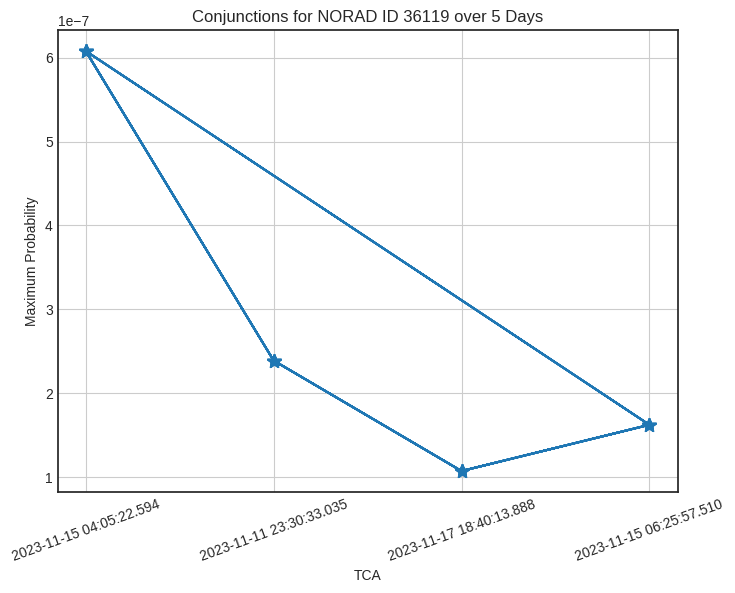

In [46]:
def calculate_satellite_analytics(norad_id):
    specific_data = merged_data[merged_data['NORAD_CAT_ID_1'] == norad_id]
    return specific_data

norad_id = 36119

plt.figure(figsize=(8, 6))
plt.plot(specific_data['TCA'], specific_data['MAX_PROB'], marker='*',markersize=10)
plt.xlabel('TCA')
plt.ylabel('Maximum Probability')
plt.title(f'Conjunctions for NORAD ID {norad_id} over 5 Days')
plt.xticks(rotation=20)
plt.grid(True)
plt.show()